In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
import helpers as hlp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load & Merge CSV Data

In [4]:
aws_data_dir = '../data/web_scraped/aws_final/'

# Use helper function to load and merge CSVs from folders in above dir
df_all_hotels = hlp.merge_csv_mult_dir(aws_data_dir)

Folders: ['New_York_City-New_York.pg6', 'Honolulu-Hawaii.pg1', 'Tokyo-Kanto.pg5', 'New_York_City-New_York-pg1', 'Tokyo-Kanto-pg2', 'Honolulu-Hawaii.pg3', 'New_York_City-New_York-pg4', 'Tokyo-Kanto-pg1', 'Honolulu-Hawaii.pg2', 'Honolulu-Hawaii.pg4']


In [5]:
df_all_hotels.shape

(481169, 10)

In [6]:
df_all_hotels.head()

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder
0,751035792,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"March 15, 2020",From the moment we walked in the door we were ...,NaN,0,5.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York.pg6
1,750880298,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"March 14, 2020",I loved drinking at the bar with Brian C. The ...,NaN,0,5.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York.pg6
2,750330115,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"March 10, 2020",I’m originally from Manhattan and had to go ba...,NYC,0,5.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York.pg6
3,750321994,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"March 10, 2020","Excellent hotel, fab location close to Ground ...",NaN,4,5.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York.pg6
4,749915420,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"March 8, 2020",My frequent stays at the Moxy only improve as ...,NaN,0,5.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York.pg6


In [7]:
df_all_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481169 entries, 0 to 481168
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   review_id      481169 non-null  int64  
 1   url            481169 non-null  object 
 2   hotel_name     481169 non-null  object 
 3   review_date    481169 non-null  object 
 4   review_body    481169 non-null  object 
 5   user_location  411463 non-null  object 
 6   helpful_vote   481169 non-null  int64  
 7   rating         481169 non-null  float64
 8   csv            481169 non-null  object 
 9   folder         481169 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 36.7+ MB


In [8]:
# Check for duplicate rows
dup_rows = df_all_hotels[df_all_hotels.duplicated()].count()
print('Number of duplicate rows:\n\n{}'.format(dup_rows))

Number of duplicate rows:

review_id        0
url              0
hotel_name       0
review_date      0
review_body      0
user_location    0
helpful_vote     0
rating           0
csv              0
folder           0
dtype: int64


In [9]:
# Get count, pct, and type of missing data (per column)
hlp.get_nulls(df_all_hotels)

,Total,Percent,Type
user_location,69706,0.144868,object
folder,0,0.000000,object
csv,0,0.000000,object
rating,0,0.000000,float64
helpful_vote,0,0.000000,int64
review_body,0,0.000000,object
review_date,0,0.000000,object
hotel_name,0,0.000000,object
url,0,0.000000,object
review_id,0,0.000000,int64


# Clean & Prep Data

In [10]:
df_all_hotels_cleaned = df_all_hotels.copy()

# Use helper function to do clean & prep
df_all_hotels_cleaned = hlp.clean_and_prep(df_all_hotels_cleaned)

df_all_hotels_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481169 entries, 0 to 481168
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   review_id      481169 non-null  int64  
 1   url            481169 non-null  object 
 2   hotel_name     481169 non-null  object 
 3   review_date    481169 non-null  object 
 4   review_body    481169 non-null  object 
 5   user_location  481169 non-null  object 
 6   helpful_vote   481169 non-null  int64  
 7   rating         481169 non-null  float64
 8   csv            481169 non-null  object 
 9   folder         481169 non-null  object 
 10  City           481169 non-null  object 
 11  polarity       481169 non-null  float64
 12  sentiment_int  481169 non-null  int64  
 13  sentiment      481169 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 55.1+ MB


# EDA

In [11]:
df_all_hotels_cleaned.sample(15)

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder,City,polarity,sentiment_int,sentiment
418802,123930320,https://www.tripadvisor.com/Hotel_Review-g1412...,"The Ritz-Carlton, Tokyo","January 31, 2012",This Hotel is a real modern palace but the vie...,Paris,5,5.0,The_Ritz_Carlton_Tokyo-Akasaka_Minato_Tokyo_To...,Tokyo-Kanto-pg1,Tokyo,1.0,2,positive
357925,1559014,https://www.tripadvisor.com/Hotel_Review-g6076...,The Roosevelt Hotel,"January 19, 2004",I've stayed at the Roosevelt on my last two tr...,"Ormond Beach, Florida",20,5.0,The_Roosevelt_Hotel-New_York_City_New_York__en...,New_York_City-New_York-pg4,New_York_City,1.0,2,positive
22201,582450151,https://www.tripadvisor.com/Hotel_Review-g6076...,Cassa Hotel NY 45th Street,"May 24, 2018",I know this is a bit unorthodox but I felt the...,"Springfield, Pennsylvania",0,5.0,Cassa_Hotel_NY_45th_Street-New_York_City_New_Y...,New_York_City-New_York.pg6,New_York_City,1.0,2,positive
154264,595990761,https://www.tripadvisor.com/Hotel_Review-g1413...,Keio Plaza Hotel Tokyo,"July 13, 2018",Hotel was enormous and felt like a tour group ...,"Clovelly, Australia",6,3.0,Keio_Plaza_Hotel_Tokyo-Nishishinjuku_Shinjuku_...,Tokyo-Kanto.pg5,Tokyo,0.5,1,neutral
144479,209817200,https://www.tripadvisor.com/Hotel_Review-g1413...,Hilton Tokyo,"June 10, 2014",The first thing I noticed as soon as I walked ...,"Scottsdale, Arizona",193,5.0,Hilton_Tokyo-Nishishinjuku_Shinjuku_Tokyo_Toky...,Tokyo-Kanto.pg5,Tokyo,1.0,2,positive
155815,252419851,https://www.tripadvisor.com/Hotel_Review-g1413...,Keio Plaza Hotel Tokyo,"February 3, 2015",Excellent hotel for both business and leasure ...,"Vienna, Austria",12,5.0,Keio_Plaza_Hotel_Tokyo-Nishishinjuku_Shinjuku_...,Tokyo-Kanto.pg5,Tokyo,1.0,2,positive
451152,490805106,https://www.tripadvisor.com/Hotel_Review-g6098...,Pacific Marina Inn,"June 5, 2017",This hotel is fairly close to the airport and ...,"Melbourne, Victoria, Australia",22,3.0,Pacific_Marina_Inn-Honolulu_Oahu_Hawaii__en.csv,Honolulu-Hawaii.pg2,Honolulu,0.5,1,neutral
240465,136261383,https://www.tripadvisor.com/Hotel_Review-g6098...,Halekulani Hotel,"August 4, 2012",Stayed two nights in two bedroom Diamond Head ...,"Fort Myers, Florida",46,5.0,Halekulani_Hotel-Honolulu_Oahu_Hawaii__en.csv,Honolulu-Hawaii.pg3,Honolulu,1.0,2,positive
425302,744512884,https://www.tripadvisor.com/Hotel_Review-g1066...,Prostyle Ryokan Tokyo Asakusa,"February 11, 2020","It's new hotel, so clean and beutiful room. Th...",n/a,0,5.0,Prostyle_Ryokan_Tokyo_Asakusa-Taito_Tokyo_Toky...,Tokyo-Kanto-pg1,Tokyo,1.0,2,positive
363413,339077877,https://www.tripadvisor.com/Hotel_Review-g6076...,Park Central Hotel New York,"January 10, 2016",We stayed at the Park Central in July after a ...,"Leicestershire, United Kingdom",27,4.0,Park_Central_Hotel_New_York-New_York_City_New_...,New_York_City-New_York-pg4,New_York_City,1.0,2,positive


In [12]:
# Print how many unique values each column has
hlp.print_unique_ct(df_all_hotels_cleaned)

Count of Unique Values per Column:

review_id: 455262
url: 91148
hotel_name: 264
review_date: 6320
review_body: 455194
user_location: 45266
helpful_vote: 953
rating: 5
csv: 264
folder: 10
City: 3
polarity: 3
sentiment_int: 3
sentiment: 3


In [13]:
df_all_hotels_cleaned.describe()

,review_id,helpful_vote,rating,polarity,sentiment_int
count,4.811690e+05,481169.000000,481169.000000,481169.000000,481169.000000
mean,3.703273e+08,27.994183,4.090983,0.834505,1.669010
std,2.089674e+08,233.408030,1.106502,0.326039,0.652079
min,2.824200e+05,0.000000,1.000000,0.000000,0.000000
25%,1.889582e+08,1.000000,4.000000,1.000000,2.000000
50%,3.544817e+08,8.000000,4.000000,1.000000,2.000000
75%,5.496229e+08,27.000000,5.000000,1.000000,2.000000
max,7.534967e+08,112061.000000,5.000000,1.000000,2.000000


Total Number of Reviews: 481169


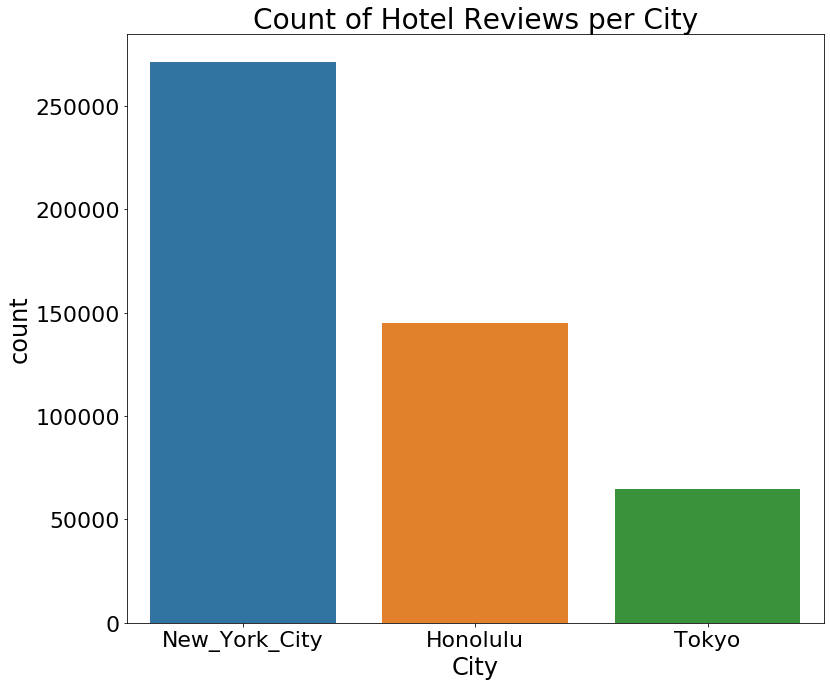

In [14]:
# Plot counts - Reviews per city
df = df_all_hotels_cleaned
print('Total Number of Reviews:', df.shape[0])

fig, ax = plt.subplots(figsize=(12,10))
plot = sns.countplot(data=df, x='City', ax=ax, order = df['City'].value_counts().index)
ax.set_title('Count of Hotel Reviews per City', size=BIGGEST_SIZE)
ax.set_xlabel('City')
fig.tight_layout()
fig.savefig('../images/countplot_reviews_byCity_full')

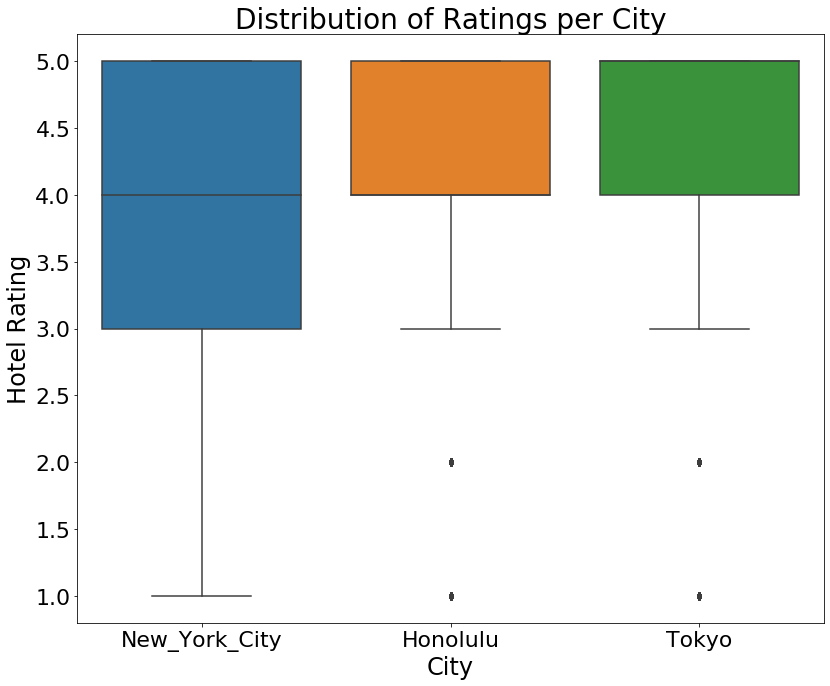

In [15]:
# Plot boxplot - Ratings per city
figsize=(12, 10)
fig, ax = plt.subplots(figsize=figsize)
plot = sns.boxplot(x='City', y='rating', data=df, ax=ax, order = df['City'].value_counts().index)
ax.set_title('Distribution of Ratings per City', size=BIGGEST_SIZE)
ax.set_ylabel('Hotel Rating')
ax.set_xlabel('City')
fig.tight_layout()
fig.savefig('../images/boxplt_ratings_byCity_full')

Total Number of Ratings:  481169


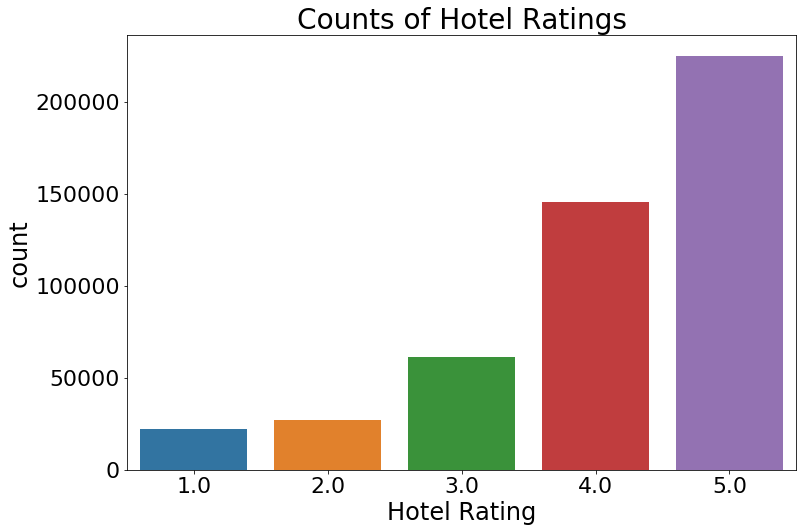

In [16]:
# Plot counts - Ratings
df = df_all_hotels_cleaned
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
plot = sns.countplot(data=df, x='rating', ax=ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('../images/countplot_ratings_full')

Total Number of Ratings:  481169


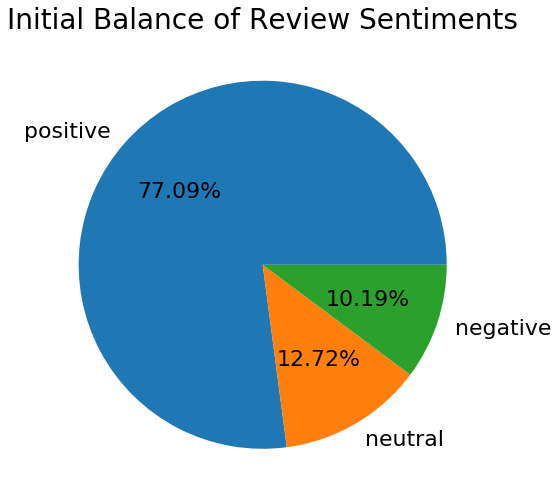

In [17]:
# Plot pie - Sentiments
df = df_all_hotels_cleaned
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(8,8))
hlp.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Initial Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('../images/pie_sentiments_full')

# Train-Test Split

In [18]:
# Specify df, target, indices, X & y
df = df_all_hotels_cleaned.copy()
target = 'sentiment'
indices = df.index

X = df['review_body']
y = df[target].to_numpy()

In [19]:
X.shape, y.shape

((481169,), (481169,))

In [20]:
X_train_init, X_test, y_train_init, y_test, indices_train_init, indices_test = train_test_split(X, y, indices, test_size=0.2, shuffle=True, stratify=y)
indices_train_init.shape, indices_test.shape

((384935,), (96234,))

In [21]:
# Get train_init df with train indices
train_init_df = df.iloc[indices_train_init,:]
train_init_df.shape

(384935, 14)

In [22]:
X_train_init2 = train_init_df['review_body']
y_train_init2 = train_init_df[target].to_numpy()
train_init_indices2 = train_init_df.index

In [23]:
X_train_init.shape, y_train_init.shape

((384935,), (384935,))

In [24]:
X_train, X_val, y_train, y_val, indices_train, indices_val = train_test_split(X_train_init, y_train_init, train_init_indices2, test_size=0.2, shuffle=True, stratify=y_train_init)
indices_train.shape, indices_val.shape

((307948,), (76987,))

## Handling class imbalance by under-sampling train data

In [25]:
# Get train df with train indices
train_df = df.iloc[indices_train,:]
train_df.shape

(307948, 14)

In [26]:
# Get classes and counts
unique, counts = np.unique(y_train, return_counts=True)
unique, counts

(array(['negative', 'neutral', 'positive'], dtype=object),
 array([ 31375,  39177, 237396]))

In [27]:
# Determine majority, middle, and minority classes
majority_class = unique[np.argmax(counts)]
minority_class = unique[np.argmin(counts)]
mid_class = np.unique(y_train[(y_train!=majority_class) & (y_train!=minority_class)])[0]
print('Majority: {}, Middle: {}, Minority: {}'.format(majority_class, mid_class, minority_class))

Majority: positive, Middle: neutral, Minority: negative


In [28]:
# Get minority class indices
minority_class_indices = train_df[train_df[target]==minority_class].index
minority_class_len = minority_class_indices.shape[0]
minority_class_len

31375

In [29]:
# Get majority class indices
majority_class_indices = train_df[train_df[target]==majority_class].index
majority_class_indices

Int64Index([365156, 461704,  13594, 158033, 343006, 286666, 176636, 358127,
             87073, 100375,
            ...
            116329,  49809, 313300, 256047, 308455, 127161, 163639,  17412,
            241651, 152342],
           dtype='int64', length=237396)

In [30]:
# Get middle class indices
middle_class_indices = train_df[train_df[target]==mid_class].index
middle_class_indices

Int64Index([218914, 127758, 177455, 397136, 394060, 175772,  53858,  76159,
             95049,  27050,
            ...
             78520, 243109, 162526,  82923, 179927, 282470, 409290,  13700,
            394120, 432143],
           dtype='int64', length=39177)

In [31]:
# Randomly under-sample majority and middle class indices to get new under-sampled train df
rand_maj_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
rand_mid_indices = np.random.choice(middle_class_indices, minority_class_len, replace=False)
undersample_indices = np.concatenate([minority_class_indices, rand_mid_indices, rand_maj_indices])

train_df_us = df.iloc[undersample_indices,:]
train_df_us.shape

(94125, 14)

Total Number of Ratings:  94125


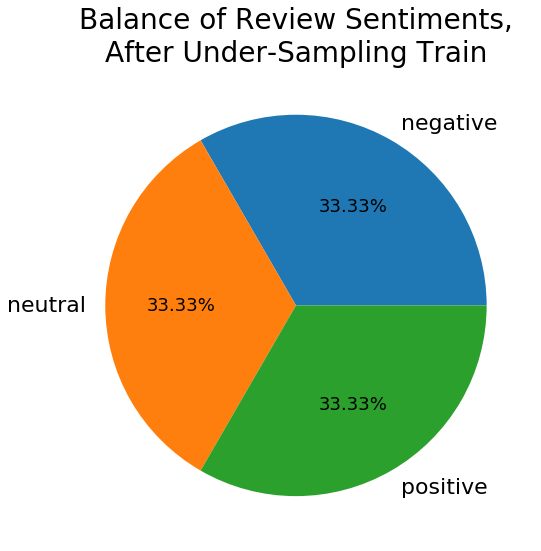

In [32]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(10,8))
hlp.plot_pie(train_df_us[target], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.tight_layout()
fig.savefig('../images/pie_sentiments_train_undersample')

In [33]:
X_train_us = train_df_us['review_body']
y_train_us = train_df_us[target].to_numpy()

# NLP & Predictive Modeling

In [34]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
# nltk.download('stopwords')
import nltk
# nltk.download('wordnet')

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [52]:
nb_def = MultinomialNB()
lr_newton = LogisticRegression(multi_class='multinomial', solver="newton-cg")
rf_10est = RandomForestClassifier(n_estimators=10)
gb_def = GradientBoostingClassifier(n_estimators=10)
ab_def = AdaBoostClassifier(n_estimators=10)

## max_features=5000

### Tf-idf, snowball stemmer, 5000 max_features (filter English stopwords)

In [36]:
tfidf=True
stemmer='snowball'
max_features=5000

vect_tfidf_snow_5000, vocab_tfidf_snow_5000 = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
Using SnowballStemmer
Max features: 5000


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


### Tf-idf, wordnet lemmatizer, 5000 max_features (filter English stopwords)

In [37]:
tfidf=True
stemmer='lem'
max_features=5000

vect_tfidf_lem_5000, vocab_tfidf_lem_5000 = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
Using WordNetLemmatizer
Max features: 5000


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


## Snow

In [38]:
vocab_tfidf_snow_5000

array(['aaa', 'aback', 'abandon', ..., 'zero', 'zone', 'zoo'],
      dtype='<U15')

In [39]:
Xtr_tfidf_snow_5000 = vect_tfidf_snow_5000(X_train_us)

In [40]:
Xval_tfidf_snow_5000 = vect_tfidf_snow_5000(X_val)

MultinomialNB
              precision    recall  f1-score   support

    positive       0.61      0.77      0.68      7844
     neutral       0.35      0.59      0.44      9794
    negative       0.96      0.82      0.89     59349

    accuracy                           0.78     76987
   macro avg       0.64      0.73      0.67     76987
weighted avg       0.85      0.78      0.81     76987



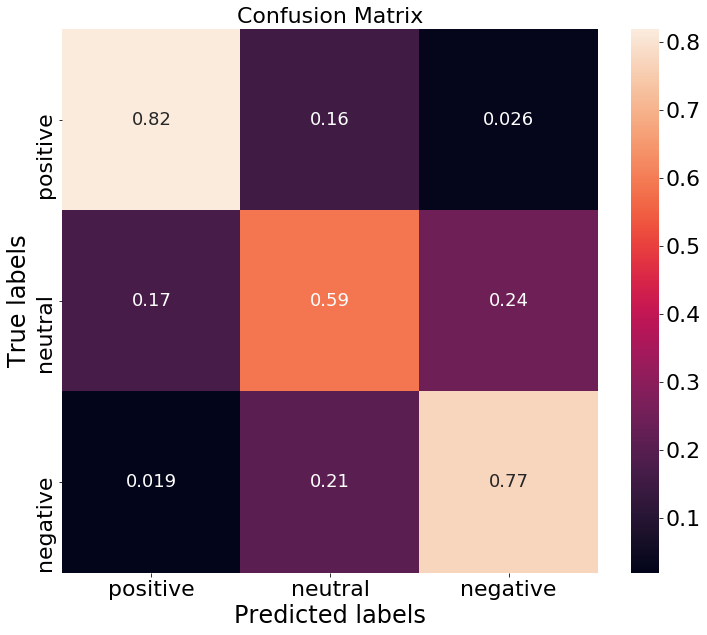

In [41]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(nb_def, Xtr_tfidf_snow_5000, y_train_us, Xval_tfidf_snow_5000, y_val, fig, ax)

LogisticRegression
              precision    recall  f1-score   support

    positive       0.67      0.80      0.73      7844
     neutral       0.39      0.64      0.48      9794
    negative       0.97      0.84      0.90     59349

    accuracy                           0.81     76987
   macro avg       0.68      0.76      0.70     76987
weighted avg       0.87      0.81      0.83     76987



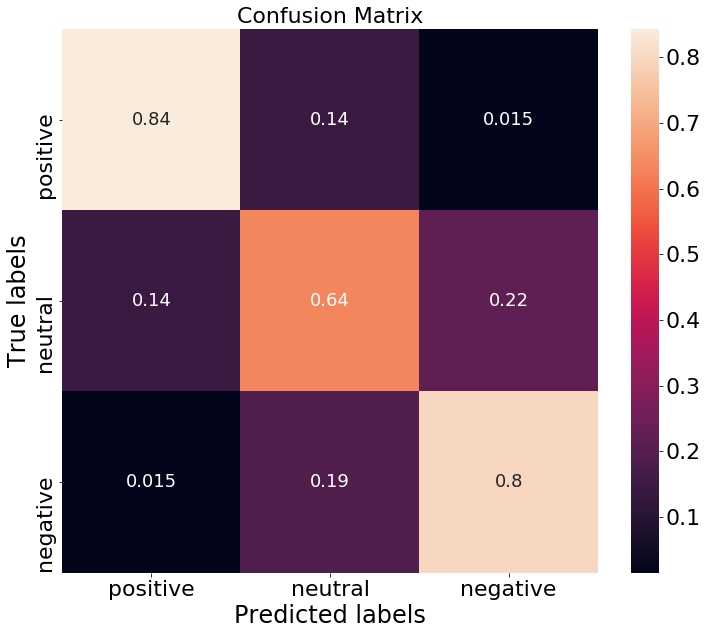

In [42]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(lr_newton, Xtr_tfidf_snow_5000, y_train_us, Xval_tfidf_snow_5000, y_val, fig, ax)

RandomForestClassifier
              precision    recall  f1-score   support

    positive       0.46      0.75      0.58      7844
     neutral       0.26      0.51      0.34      9794
    negative       0.95      0.72      0.82     59349

    accuracy                           0.69     76987
   macro avg       0.56      0.66      0.58     76987
weighted avg       0.81      0.69      0.73     76987



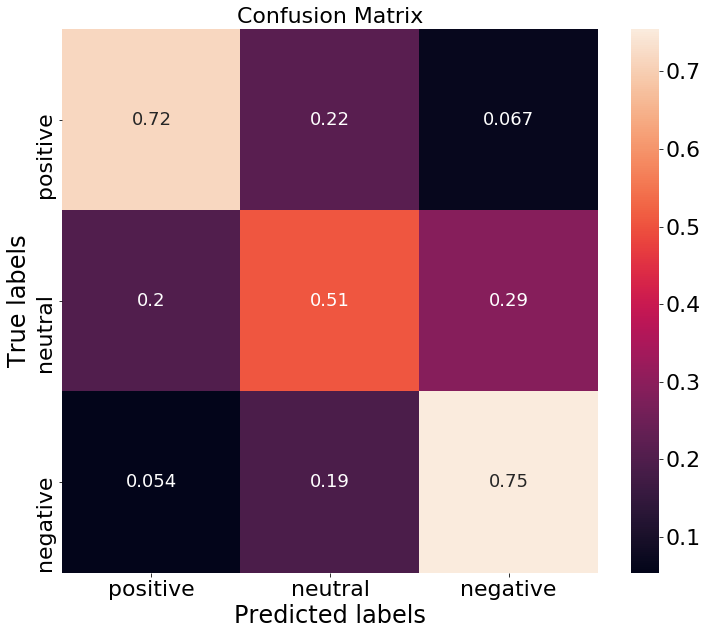

In [43]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(rf_10est, Xtr_tfidf_snow_5000, y_train_us, Xval_tfidf_snow_5000, y_val, fig, ax)

GradientBoostingClassifier
              precision    recall  f1-score   support

    positive       0.31      0.71      0.43      7844
     neutral       0.24      0.44      0.31      9794
    negative       0.92      0.63      0.75     59349

    accuracy                           0.62     76987
   macro avg       0.49      0.60      0.50     76987
weighted avg       0.77      0.62      0.66     76987



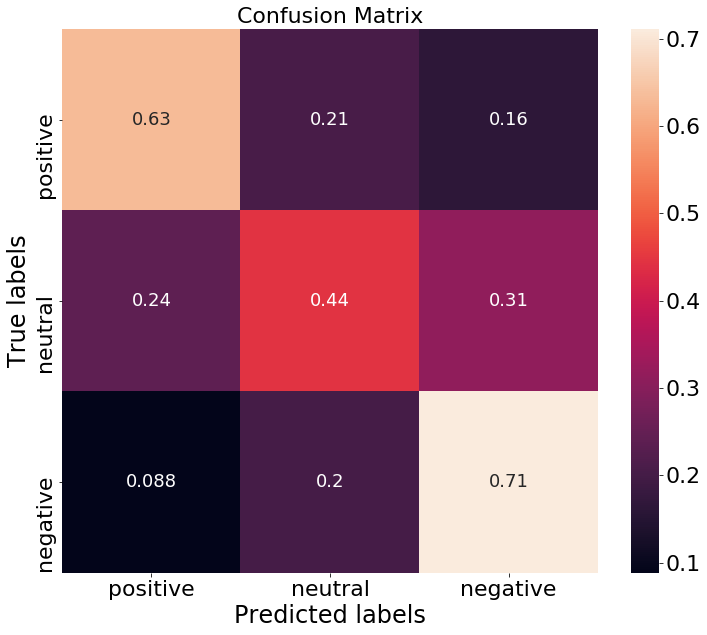

In [53]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(gb_def, Xtr_tfidf_snow_5000, y_train_us, Xval_tfidf_snow_5000, y_val, fig, ax)

KeyboardInterrupt: 

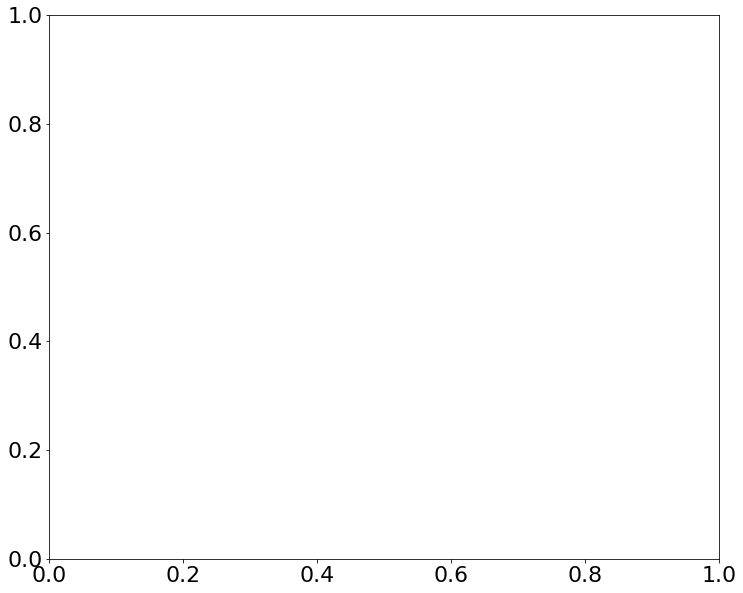

In [54]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(ab_def, Xtr_tfidf_snow_5000, y_train_us, Xval_tfidf_snow_5000, y_val, fig, ax)

## Lem

In [45]:
vocab_tfidf_lem_5000

array(['aaa', 'abc', 'ability', ..., 'zero', 'zone', 'zoo'], dtype='<U16')

In [46]:
Xtr_tfidf_lem_5000 = vect_tfidf_lem_5000(X_train_us)

In [47]:
Xval_tfidf_lem_5000 = vect_tfidf_lem_5000(X_val)

MultinomialNB
              precision    recall  f1-score   support

    positive       0.61      0.77      0.68      7844
     neutral       0.35      0.59      0.44      9794
    negative       0.96      0.82      0.89     59349

    accuracy                           0.79     76987
   macro avg       0.64      0.73      0.67     76987
weighted avg       0.85      0.79      0.81     76987



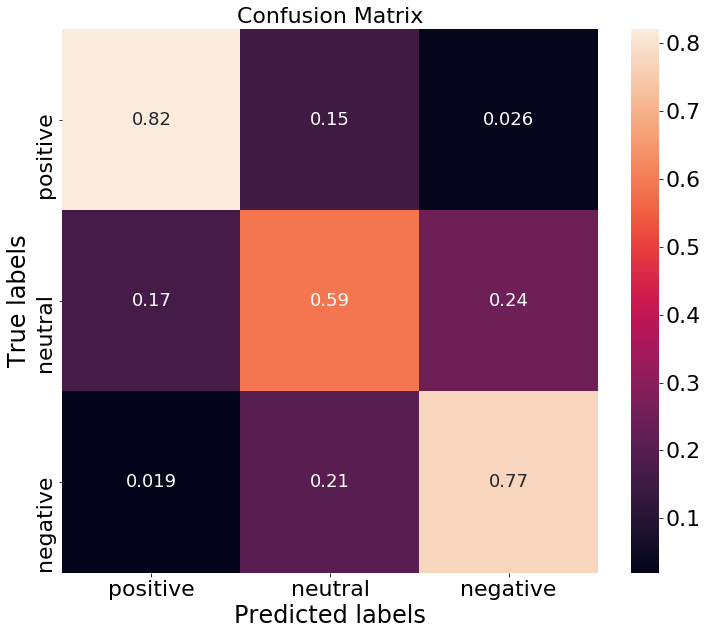

In [48]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(nb_def, Xtr_tfidf_lem_5000, y_train_us, Xval_tfidf_lem_5000, y_val, fig, ax)

LogisticRegression
              precision    recall  f1-score   support

    positive       0.67      0.80      0.73      7844
     neutral       0.39      0.64      0.49      9794
    negative       0.97      0.84      0.90     59349

    accuracy                           0.81     76987
   macro avg       0.68      0.76      0.71     76987
weighted avg       0.87      0.81      0.83     76987



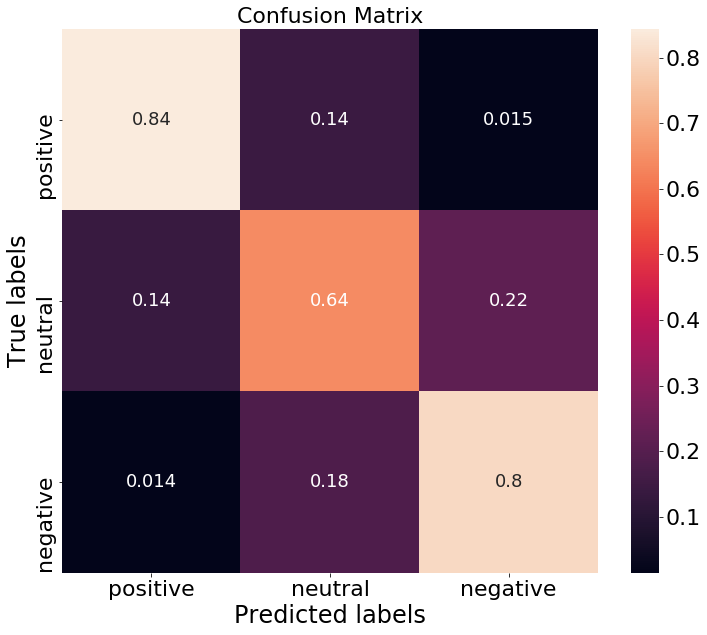

In [49]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(lr_newton, Xtr_tfidf_lem_5000, y_train_us, Xval_tfidf_lem_5000, y_val, fig, ax)

RandomForestClassifier
              precision    recall  f1-score   support

    positive       0.47      0.77      0.58      7844
     neutral       0.26      0.51      0.34      9794
    negative       0.95      0.72      0.81     59349

    accuracy                           0.69     76987
   macro avg       0.56      0.66      0.58     76987
weighted avg       0.81      0.69      0.73     76987



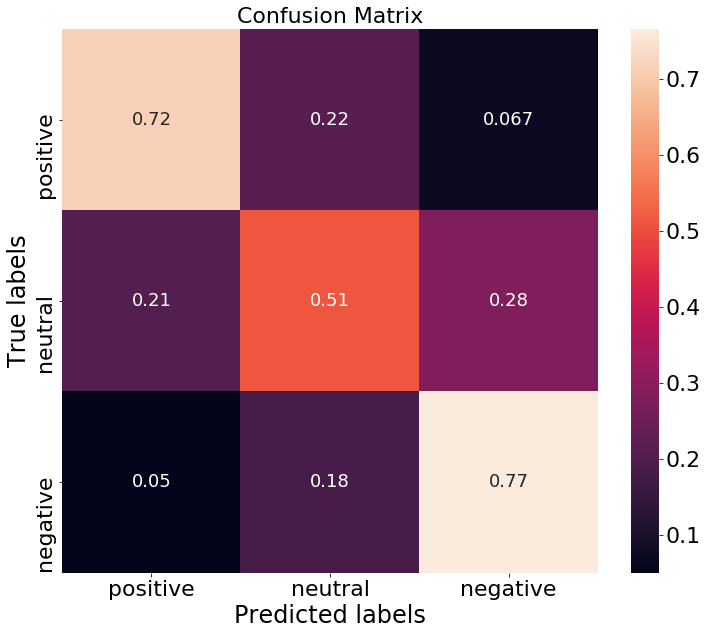

In [50]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(rf_10est, Xtr_tfidf_lem_5000, y_train_us, Xval_tfidf_lem_5000, y_val, fig, ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(gb_def, Xtr_tfidf_lem_5000, y_train_us, Xval_tfidf_lem_5000, y_val, fig, ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(ab_def, Xtr_tfidf_lem_5000, y_train_us, Xval_tfidf_lem_5000, y_val, fig, ax)

## Feature Importances

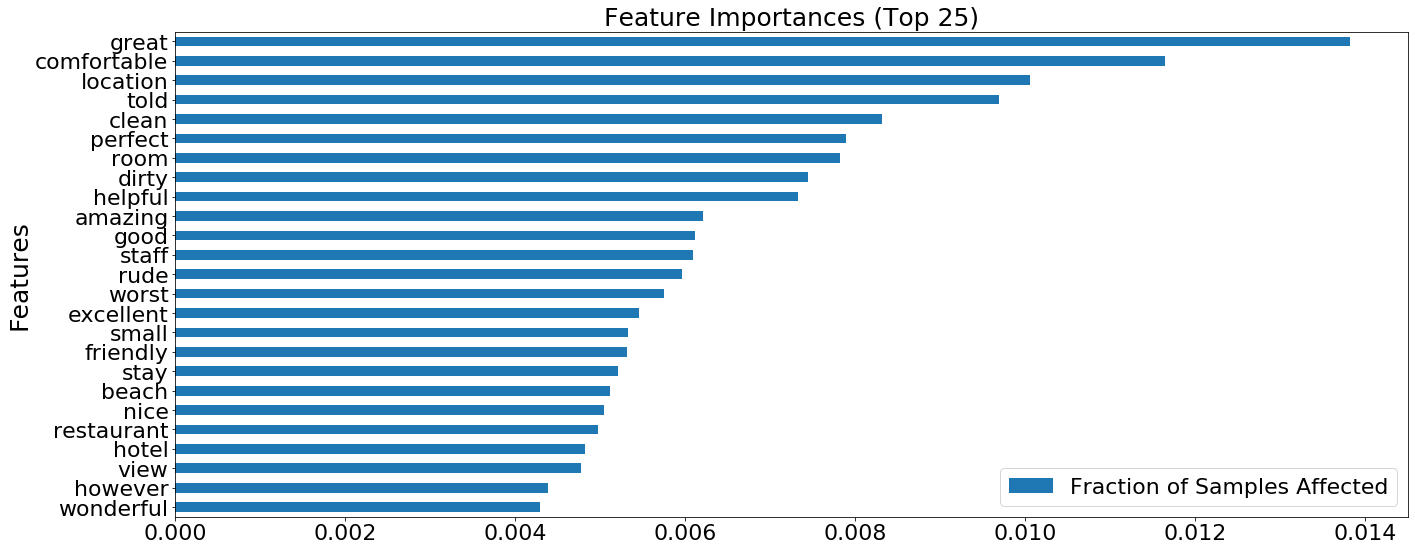

In [64]:
feature_list = vocab_tfidf_lem_5000
fig, ax = plt.subplots(figsize=(20,8))
fig, ax, rev_sort_feature_cols = hlp.plot_topN_features(rf_10est.fit(Xtr_tfidf_lem_5000, y_train_us).feature_importances_, feature_list, 25, fig, ax)
fig.tight_layout()
fig.savefig('../images/feat_importances_rf_top25_lem')

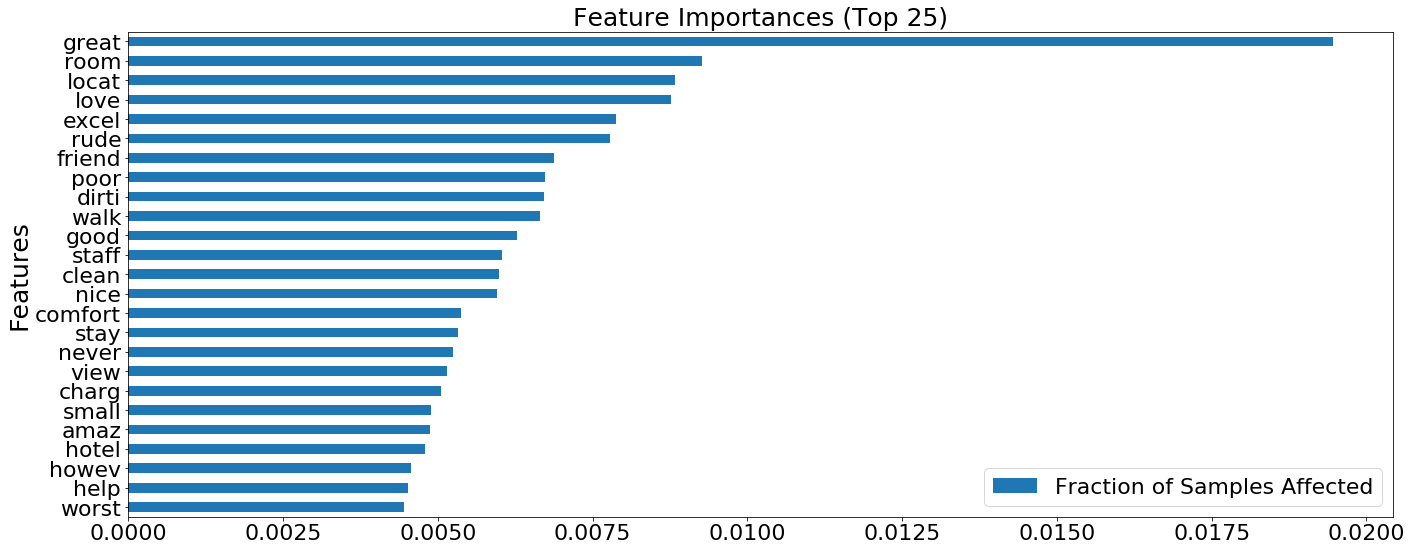

In [65]:
feature_list = vocab_tfidf_snow_5000
fig, ax = plt.subplots(figsize=(20,8))
fig, ax, rev_sort_feature_cols = hlp.plot_topN_features(rf_10est.fit(Xtr_tfidf_snow_5000, y_train_us).feature_importances_, feature_list, 25, fig, ax)
fig.tight_layout()
fig.savefig('../images/feat_importances_rf_top25_snow')

In [ ]:
# don't go beyond here with Run All
assert False

### Hyperparameter Tuning with GridSearchCV

In [55]:
logistic_regression_grid = {'C': [0.001, 0.01, 0.1]}

lr_gridsearch = GridSearchCV(LogisticRegression(multi_class='multinomial', solver="newton-cg"),
                             logistic_regression_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')

In [56]:
lr_gridsearch.fit(Xtr_tfidf_lem_5000, y_train_us)

print("best score:", lr_gridsearch.best_score_)
print("best parameters:", lr_gridsearch.best_params_)

best_lr_model = lr_gridsearch.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.0min finished


best score: 0.7519150066401062
best parameters: {'C': 0.1}


In [60]:
best_lr_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression
              precision    recall  f1-score   support

    positive       0.64      0.81      0.72      7844
     neutral       0.38      0.62      0.47      9794
    negative       0.97      0.83      0.90     59349

    accuracy                           0.81     76987
   macro avg       0.66      0.76      0.70     76987
weighted avg       0.86      0.81      0.82     76987



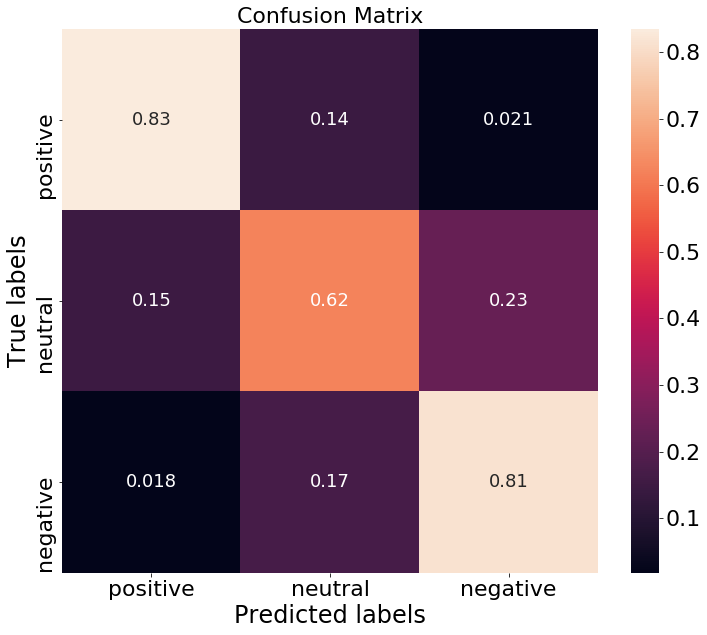

In [61]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(best_lr_model, Xtr_tfidf_lem_5000, y_train_us, Xval_tfidf_lem_5000, y_val, fig, ax)

In [62]:
Xte_tfidf_lem_5000 = vect_tfidf_lem_5000(X_test)

LogisticRegression
              precision    recall  f1-score   support

    positive       0.65      0.80      0.71      9805
     neutral       0.39      0.63      0.48     12243
    negative       0.97      0.84      0.90     74186

    accuracy                           0.81     96234
   macro avg       0.67      0.76      0.70     96234
weighted avg       0.86      0.81      0.83     96234



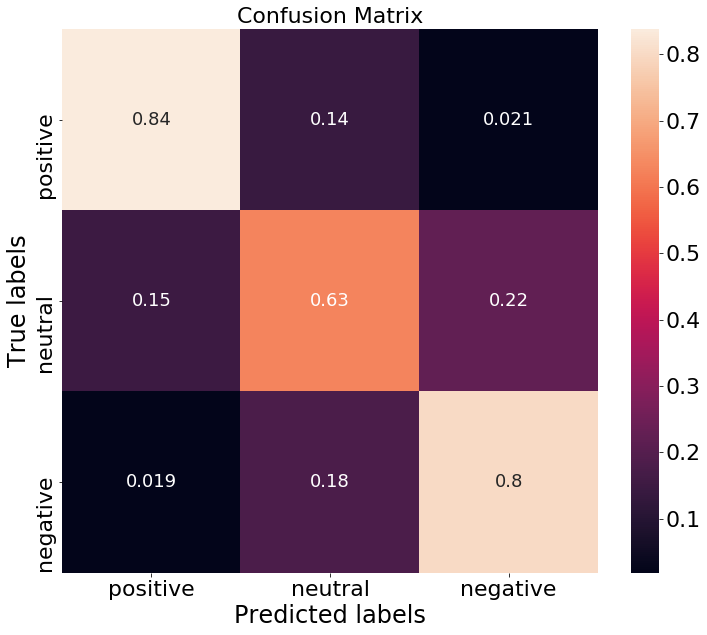

In [63]:
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = hlp.fit_pred_score_val(best_lr_model, Xtr_tfidf_lem_5000, y_train_us, Xte_tfidf_lem_5000, y_test, fig, ax)

In [57]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')

In [59]:
rf_gridsearch.fit(Xtr_tfidf_lem_5000, y_train_us)

print("best score:", rf_gridsearch.best_score_)
print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}

# Appendix

In [ ]:
# don't go beyond here with Run All
assert False

In [ ]:
# Plot distributions - Review length per sentiment
df = df_all_hotels_cleaned

fig, ax = plt.subplots(figsize=(8,8))
# Plot per sentiment
for sentiment in df['sentiment'].unique():
    sns.distplot(df.groupby('sentiment').get_group(sentiment)['review_length'], ax=ax, label=sentiment)
ax.legend()

In [ ]:
# Plot distributions - Review length per city
df = df_all_hotels_cleaned

fig, ax = plt.subplots(figsize=(8,8))
# Plot per city
for city in df['City'].unique():
    sns.distplot(df.groupby('City').get_group(city)['review_length'], ax=ax, label=city)
ax.legend()